# Support Vector Machines Salary Data


# Import necessary libraries

In [87]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing 
from sklearn import metrics 
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing 
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

# Import the data 

In [41]:
test=pd.read_csv('/Users/viswanathareddy/Assignments /Support Vector Mechines /SalaryData_Test(1).csv')
train=pd.read_csv('/Users/viswanathareddy/Assignments /Support Vector Mechines /SalaryData_Train(1).csv')

# Data Understanding 

In [42]:
df_tmp = test_tmp.append(train_tmp)
test = test_tmp.copy()
train = train_tmp.copy()
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [43]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
str_c=["workclass","education","maritalstatus","occupation","relationship","sex","native"]
number=LabelEncoder()
for i in str_c:
    train[i]=number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,Black,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,White,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,White,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,Black,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,White,1,0,0,30,37,<=50K


In [45]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,White,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,White,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,White,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,Black,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,Black,0,0,0,40,4,<=50K


In [46]:
mapping={'>50K' :1 , '<=50K':2}
train=train.replace({'Salary':mapping})
test=test.replace({'Salary':mapping})
df=train.append(test)
df1=df.copy()
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,White,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,White,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,White,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,Black,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,Black,0,0,0,40,4,<=50K


In [47]:
df1.shape

(45221, 14)

In [48]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0
capitalgain,45221.0,1101.454700,7506.511295,0.0,0.0,0.0,0.0,99999.0
capitalloss,45221.0,88.548617,404.838249,0.0,0.0,0.0,0.0,4356.0


In [49]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

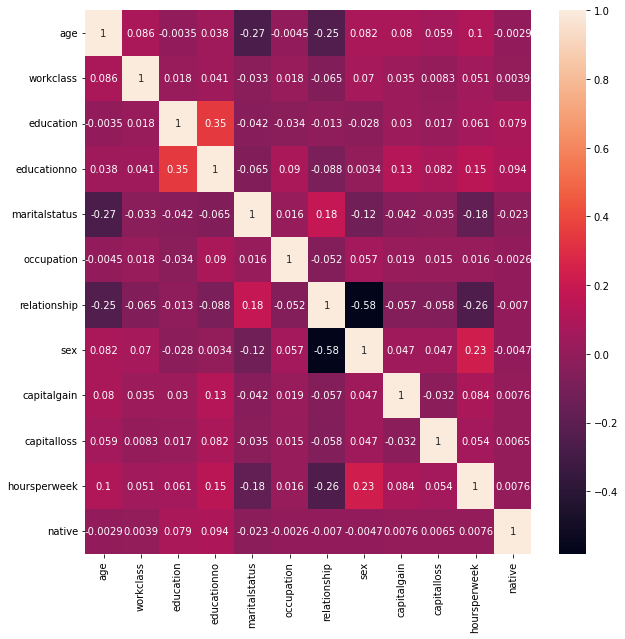

In [50]:
corr=df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [51]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['educationno'].skew()))
print("Kurtosis: {}".format(df1['educationno'].kurtosis()))

Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


<Figure size 1152x360 with 0 Axes>

In [52]:
lb = LabelEncoder()

In [53]:
train["workclass"] = lb.fit_transform(train["workclass"])
train["education"] = lb.fit_transform(train["education"])
train["maritalstatus"] = lb.fit_transform(train["maritalstatus"])
train["occupation"] = lb.fit_transform(train["occupation"])
train["relationship"] = lb.fit_transform(train["relationship"])
train["race"] = lb.fit_transform(train["race"])
train["sex"] = lb.fit_transform(train["sex"])
train["native"] = lb.fit_transform(train["native"])
train["Salary"] = lb.fit_transform(train["Salary"])

In [54]:
test["workclass"] = lb.fit_transform(test["workclass"])
test["education"] = lb.fit_transform(test["education"])
test["maritalstatus"] = lb.fit_transform(test["maritalstatus"])
test["occupation"] = lb.fit_transform(test["occupation"])
test["relationship"] = lb.fit_transform(test["relationship"])
test["race"] = lb.fit_transform(test["race"])
test["sex"] = lb.fit_transform(test["sex"])
test["native"] = lb.fit_transform(test["native"])
test["Salary"] = lb.fit_transform(test["Salary"])

# EDA

In [55]:
train = train.iloc[: 2000, :]

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            2000 non-null   int64
 1   workclass      2000 non-null   int64
 2   education      2000 non-null   int64
 3   educationno    2000 non-null   int64
 4   maritalstatus  2000 non-null   int64
 5   occupation     2000 non-null   int64
 6   relationship   2000 non-null   int64
 7   race           2000 non-null   int64
 8   sex            2000 non-null   int64
 9   capitalgain    2000 non-null   int64
 10  capitalloss    2000 non-null   int64
 11  hoursperweek   2000 non-null   int64
 12  native         2000 non-null   int64
 13  Salary         2000 non-null   int64
dtypes: int64(14)
memory usage: 218.9 KB


In [57]:
test = test.iloc[: 1300, :]

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            1300 non-null   int64
 1   workclass      1300 non-null   int64
 2   education      1300 non-null   int64
 3   educationno    1300 non-null   int64
 4   maritalstatus  1300 non-null   int64
 5   occupation     1300 non-null   int64
 6   relationship   1300 non-null   int64
 7   race           1300 non-null   int64
 8   sex            1300 non-null   int64
 9   capitalgain    1300 non-null   int64
 10  capitalloss    1300 non-null   int64
 11  hoursperweek   1300 non-null   int64
 12  native         1300 non-null   int64
 13  Salary         1300 non-null   int64
dtypes: int64(14)
memory usage: 142.3 KB


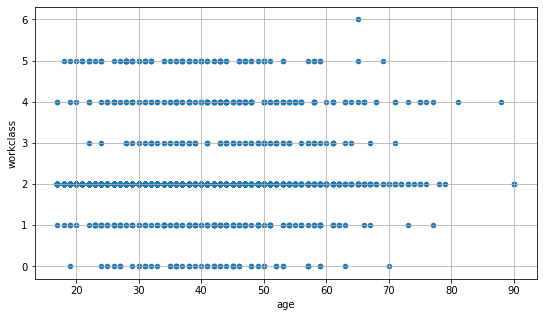

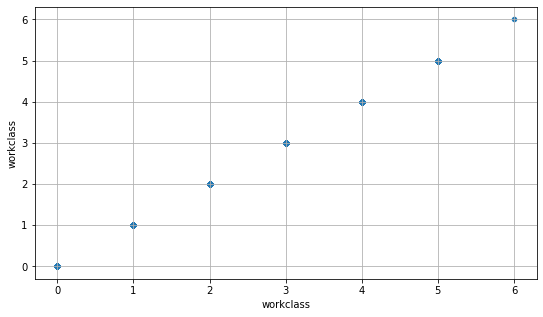

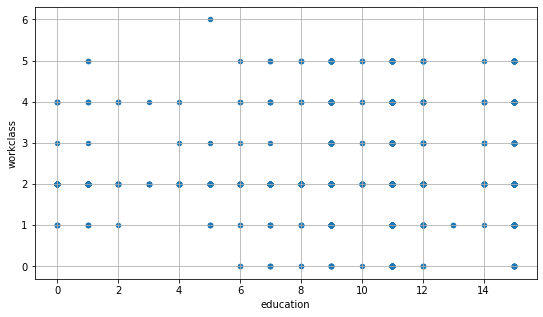

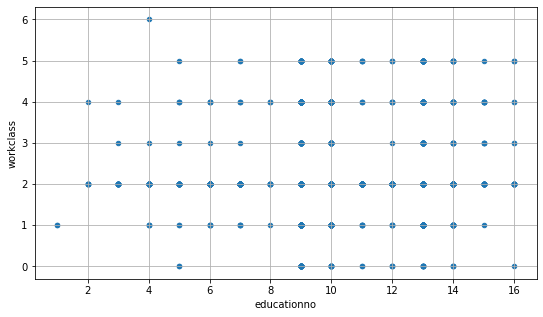

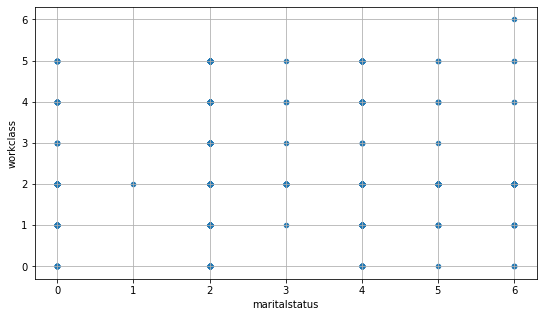

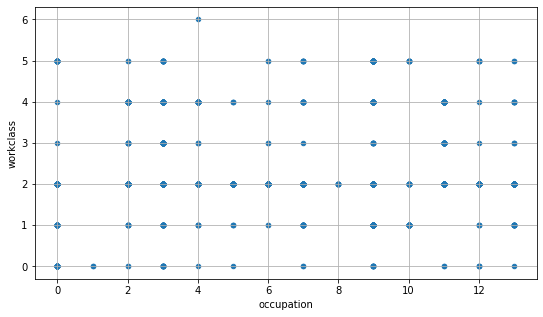

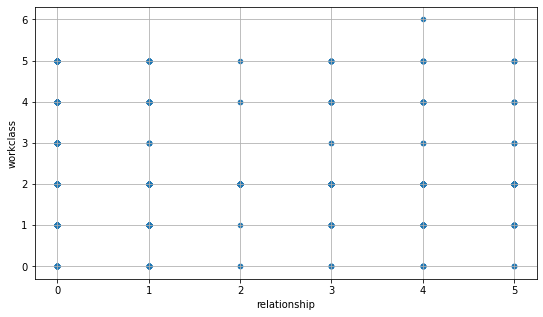

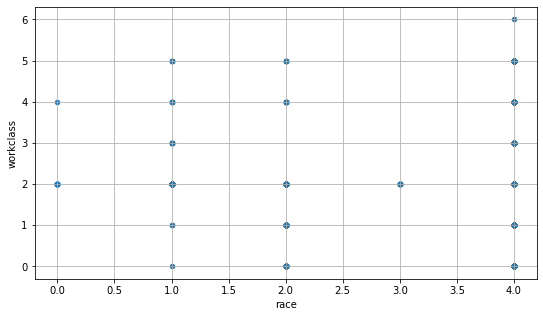

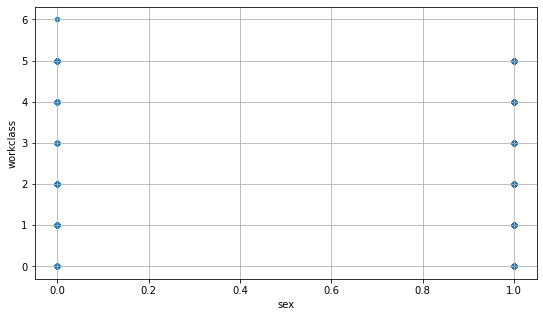

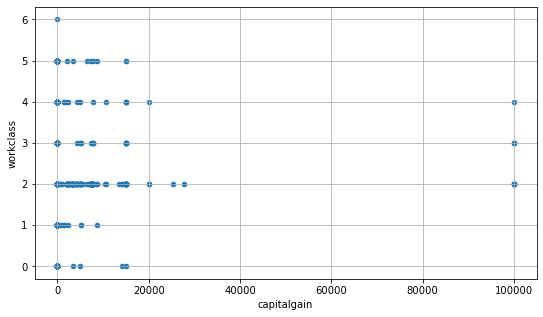

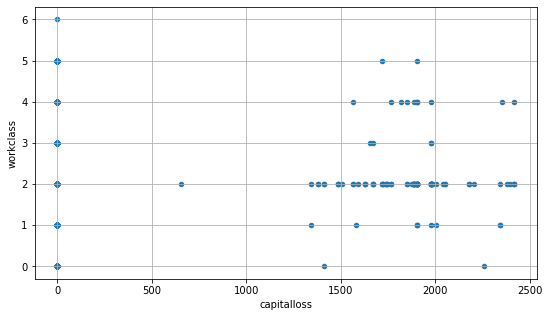

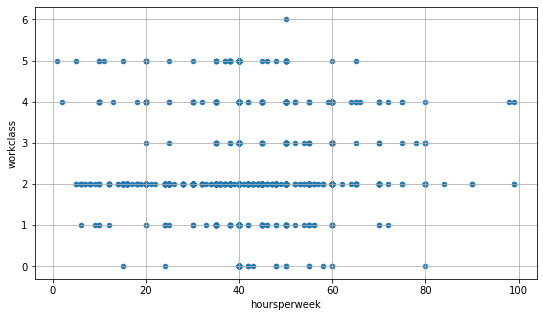

In [59]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'workclass',grid=True)

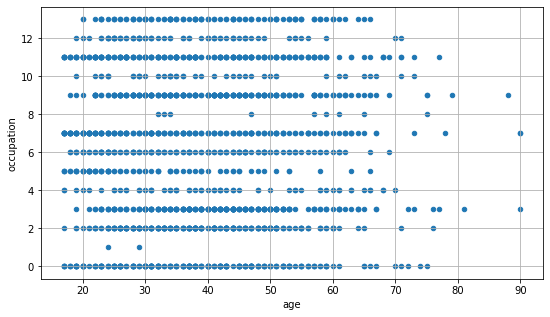

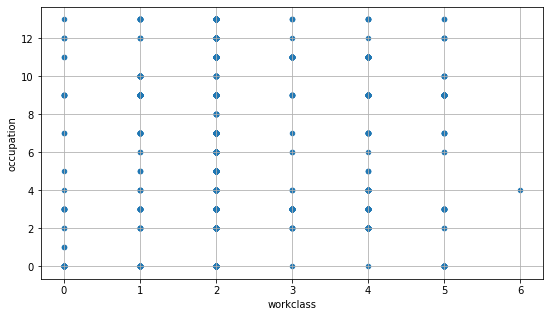

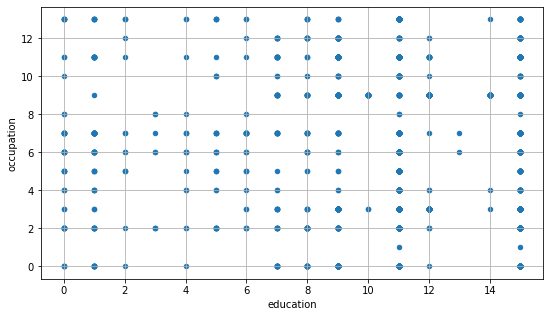

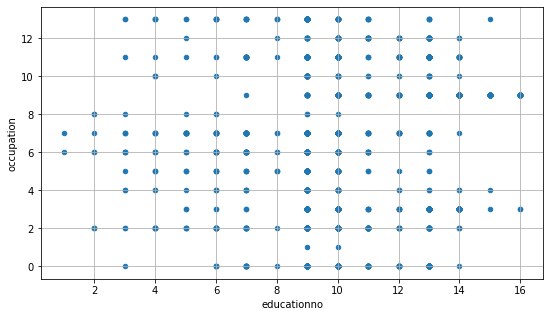

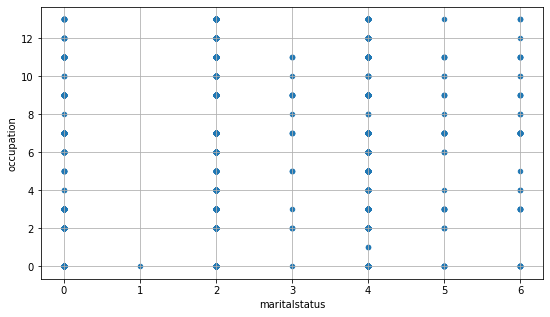

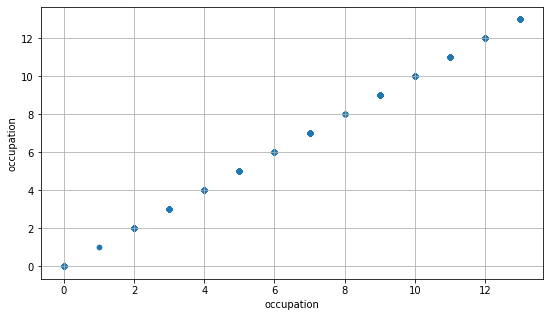

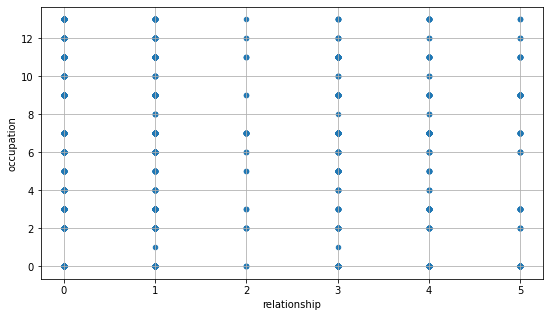

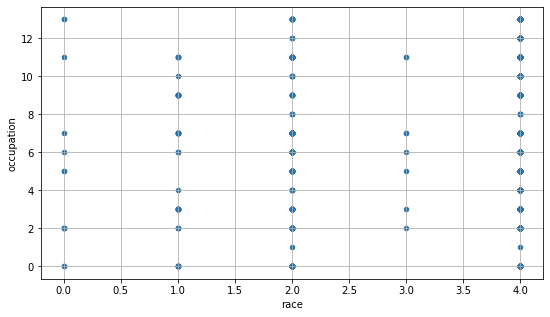

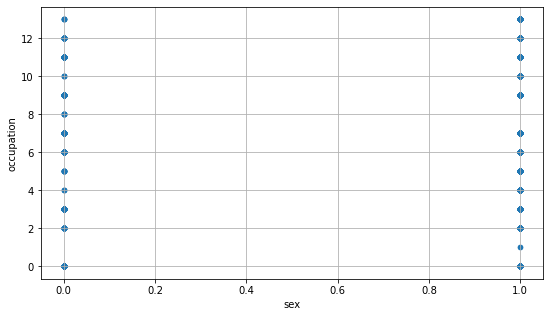

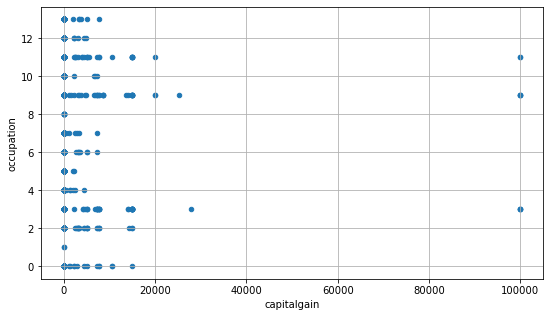

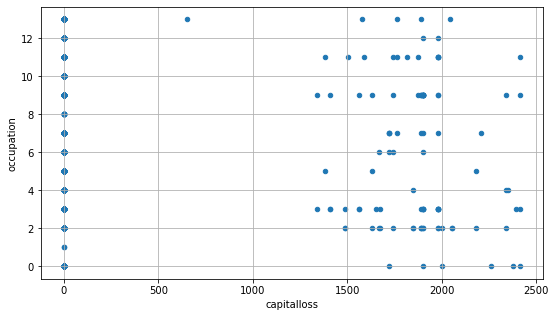

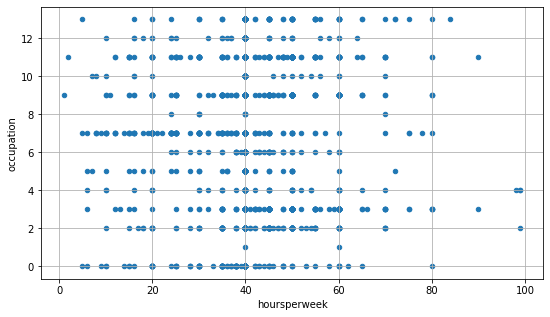

In [60]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'occupation',grid=True)

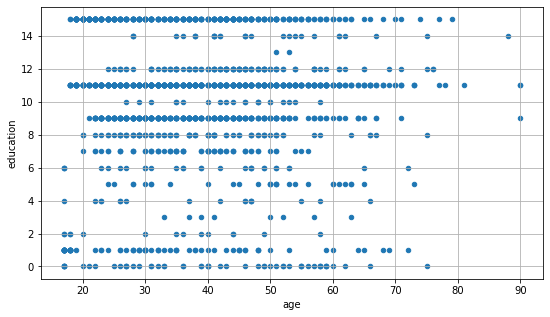

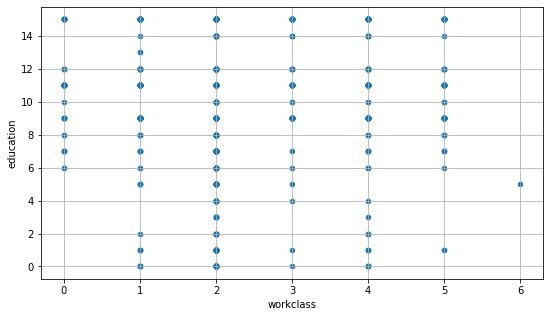

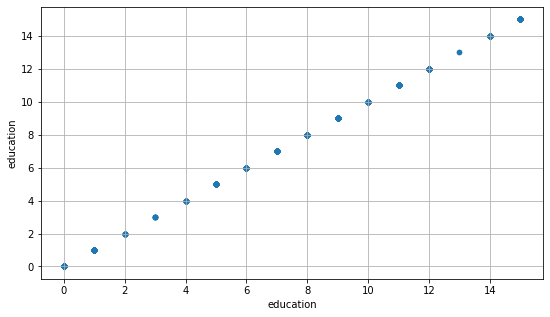

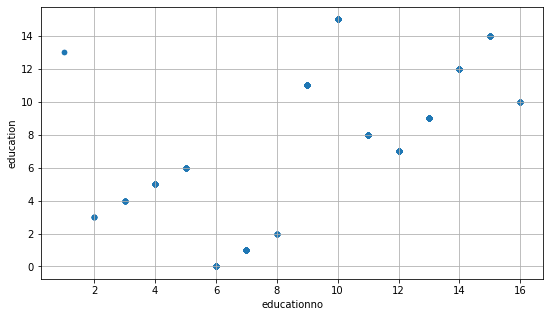

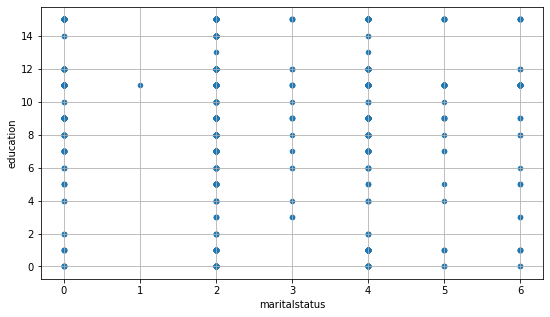

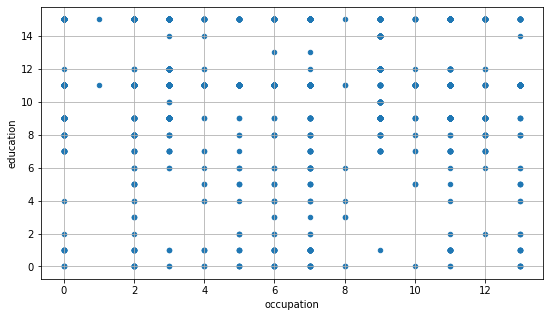

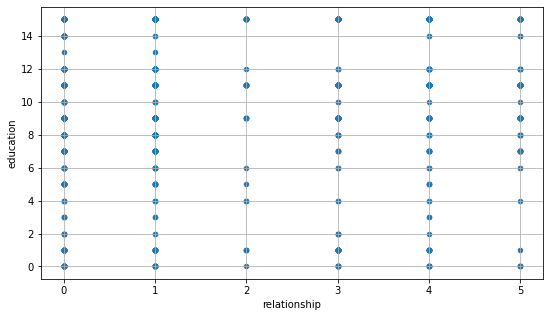

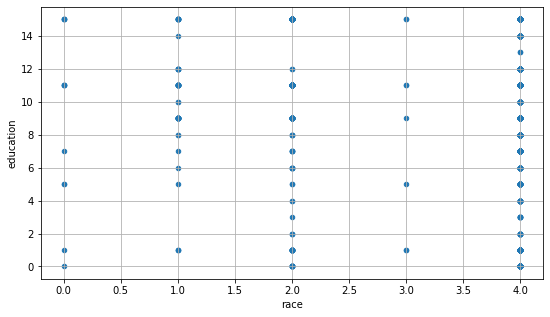

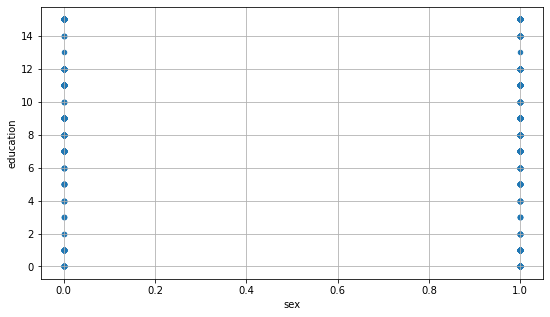

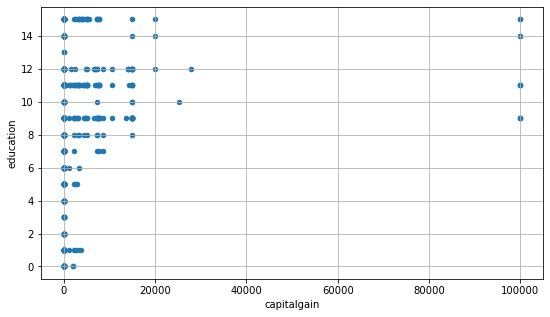

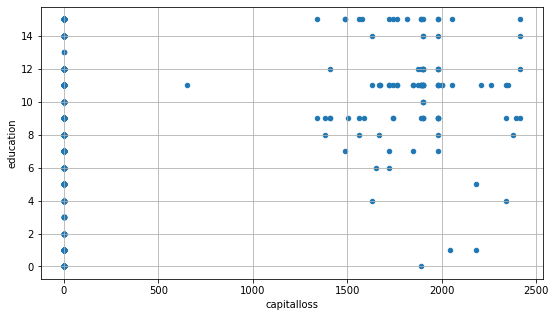

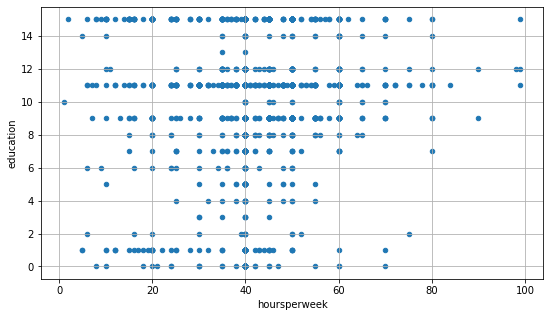

In [61]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'education',grid=True)

In [62]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080136,-0.004007,0.014781,-0.249467,-0.004634,-0.216588,0.015168,0.050730,0.081112,0.058997,0.114429,-0.001914,0.231176
workclass,0.080136,1.000000,0.029167,0.068866,-0.043219,0.033209,-0.074186,0.074418,0.087332,0.038314,-0.003069,0.031221,-0.036263,0.064561
education,-0.004007,0.029167,1.000000,0.328746,-0.047668,-0.028564,-0.033833,0.031098,-0.004879,0.035363,0.012082,0.060470,0.085718,0.051282
educationno,0.014781,0.068866,0.328746,1.000000,-0.062303,0.098459,-0.091217,0.075867,0.034123,0.095804,0.062601,0.172302,0.057602,0.308324
maritalstatus,-0.249467,-0.043219,-0.047668,-0.062303,1.000000,0.075036,0.157226,-0.083280,-0.078456,-0.044395,-0.016550,-0.187437,0.002006,-0.199289
occupation,-0.004634,0.033209,-0.028564,0.098459,0.075036,1.000000,-0.065478,0.035830,0.072483,0.016453,-0.015165,0.032509,-0.000106,0.026793
relationship,-0.216588,-0.074186,-0.033833,-0.091217,0.157226,-0.065478,1.000000,-0.100663,-0.557999,-0.052849,-0.042243,-0.256052,-0.054397,-0.211663
race,0.015168,0.074418,0.031098,0.075867,-0.083280,0.035830,-0.100663,1.000000,0.076281,0.018565,0.043238,0.065593,0.155655,0.068448
sex,0.050730,0.087332,-0.004879,0.034123,-0.078456,0.072483,-0.557999,0.076281,1.000000,0.030977,0.049696,0.205762,0.029781,0.182859
capitalgain,0.081112,0.038314,0.035363,0.095804,-0.044395,0.016453,-0.052849,0.018565,0.030977,1.000000,-0.033968,0.064462,-0.028919,0.220183


In [63]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.132698,-0.058456,-0.028238,-0.299098,-0.035747,-0.253358,0.003103,0.074865,0.107361,0.057418,0.106105,0.018697,0.226220
workclass,0.132698,1.000000,0.068824,0.066220,-0.060726,0.011914,-0.082095,0.065081,0.049687,0.053677,0.062026,0.077106,0.043338,0.077615
education,-0.058456,0.068824,1.000000,0.409201,-0.039852,-0.023030,-0.024427,-0.005501,-0.011597,0.060160,0.038734,0.063598,0.069760,0.119016
educationno,-0.028238,0.066220,0.409201,1.000000,-0.091147,0.077972,-0.050679,0.072135,-0.011529,0.170971,0.111713,0.145317,0.106144,0.313422
maritalstatus,-0.299098,-0.060726,-0.039852,-0.091147,1.000000,-0.012545,0.197796,-0.085572,-0.147099,-0.071843,-0.018926,-0.161722,0.005488,-0.226209
occupation,-0.035747,0.011914,-0.023030,0.077972,-0.012545,1.000000,-0.063657,0.037160,0.073262,0.004247,-0.038230,0.018785,0.004193,0.018910
relationship,-0.253358,-0.082095,-0.024427,-0.050679,0.197796,-0.063657,1.000000,-0.158517,-0.588370,-0.060524,-0.037262,-0.298815,0.015321,-0.259728
race,0.003103,0.065081,-0.005501,0.072135,-0.085572,0.037160,-0.158517,1.000000,0.072954,0.017319,0.064287,0.058017,0.160356,0.076017
sex,0.074865,0.049687,-0.011597,-0.011529,-0.147099,0.073262,-0.588370,0.072954,1.000000,0.070784,0.053486,0.233998,-0.037813,0.206553
capitalgain,0.107361,0.053677,0.060160,0.170971,-0.071843,0.004247,-0.060524,0.017319,0.070784,1.000000,-0.036077,0.128418,0.032191,0.249281


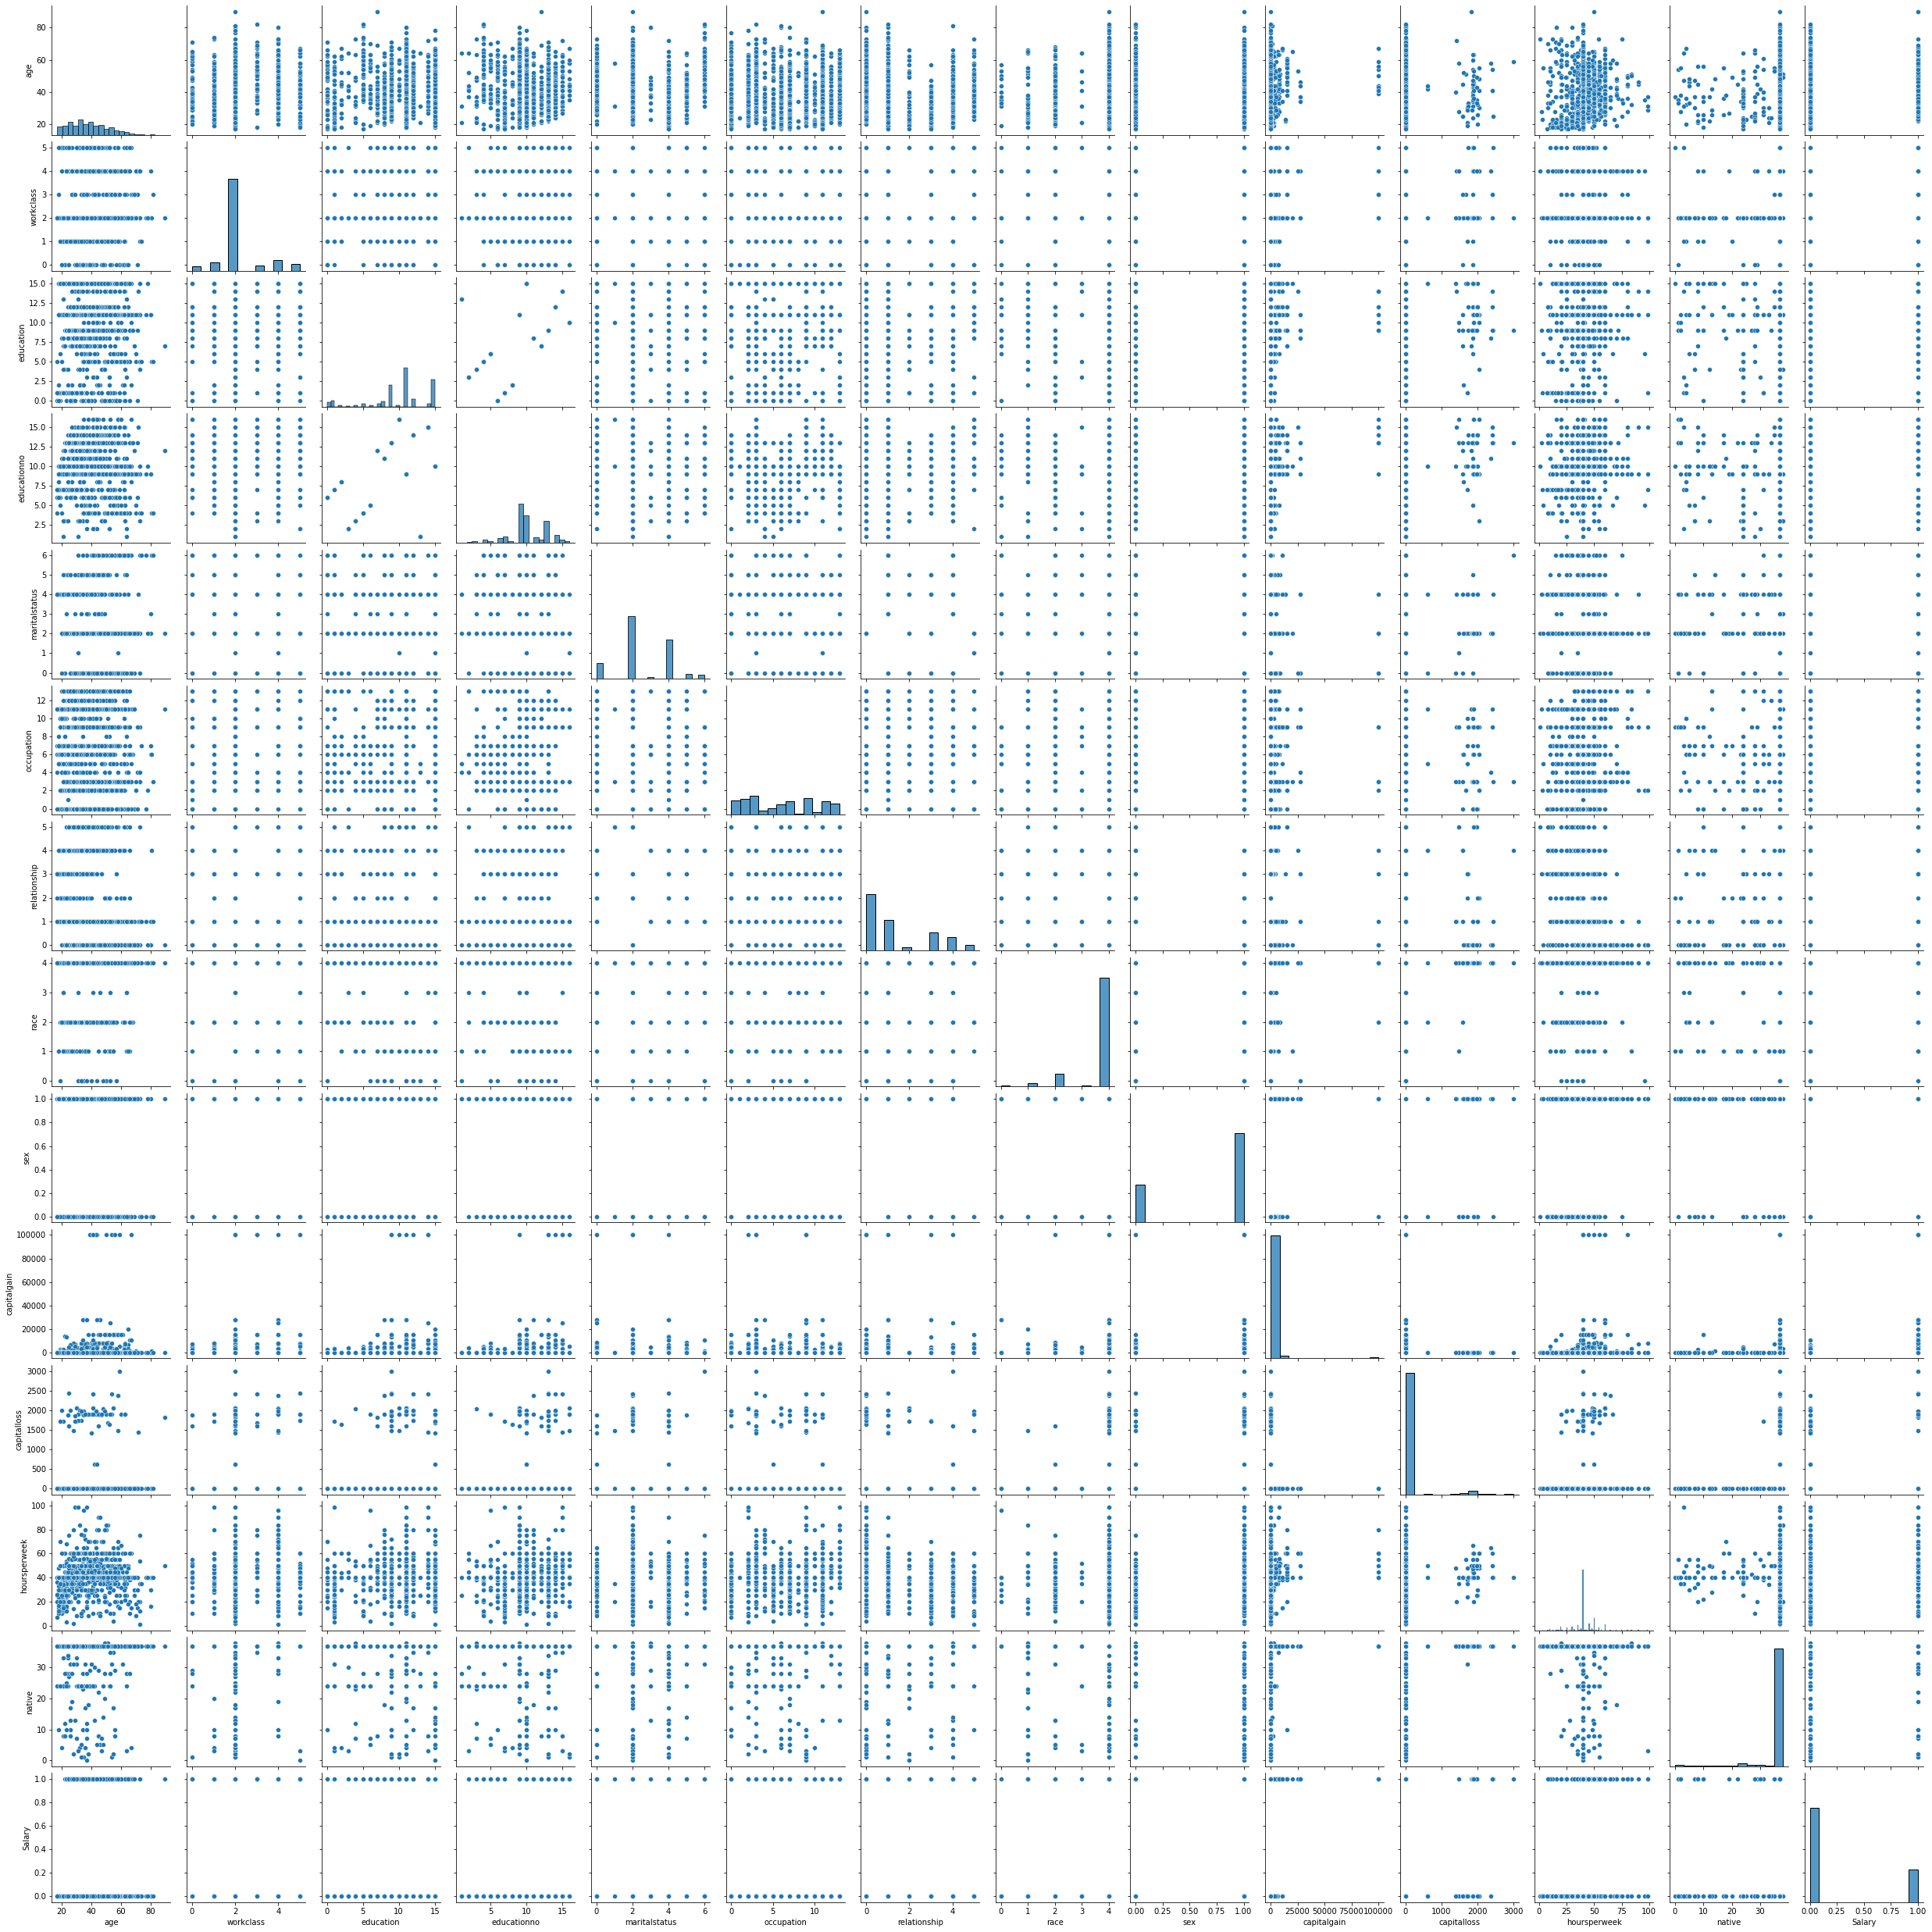

In [64]:
sns.pairplot(test)

# Data Splitting

In [65]:
X_train=train.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,33,2,11,9,5,10,3,4,0,0,0,40,37
1996,41,2,11,9,2,6,0,4,1,0,0,40,37
1997,51,2,6,5,2,13,0,4,1,0,0,40,37
1998,42,2,11,9,2,11,0,4,1,0,0,48,37


In [66]:
y_train=train.iloc[:,-1]
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: Salary, Length: 2000, dtype: int64

In [67]:
X_test=test.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,66,4,15,10,2,13,0,2,1,0,0,60,37
1296,40,2,15,10,4,2,2,0,1,0,0,30,37
1297,37,2,4,3,2,6,0,4,1,0,0,40,7
1298,34,2,9,13,2,11,0,4,1,0,0,40,37


In [68]:
y_test = test.iloc[:,-1]
y_test

0       0
1       0
2       1
3       1
4       0
       ..
1295    0
1296    0
1297    0
1298    0
1299    0
Name: Salary, Length: 1300, dtype: int64

In [69]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 13), (2000,), (1300, 13), (1300,))

# SVM Model

In [70]:
model = SVC()
model.fit(X_train, y_train)

SVC()

# Predicting model

In [71]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Model Evaluation

In [84]:
print(confusion_matrix(y_test, y_pred))

[[961   5]
 [267  67]]


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       966
           1       0.93      0.20      0.33       334

    accuracy                           0.79      1300
   macro avg       0.86      0.60      0.60      1300
weighted avg       0.82      0.79      0.74      1300



# Inference
Model is not predicting well, so we will improve the model by hyperparameter tunning using grid search method.

# Improving Model using Grid Search CV

In [85]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [88]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [90]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.752 total time=   0.2s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.2s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.2s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.2s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.743 total time=   0.2s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.2s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.2s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.2s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.2s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.2s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.775 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

[CV 2/5] END .........C=20, gamma=1, kernel=rbf;, score=0.745 total time=   0.2s
[CV 3/5] END .........C=20, gamma=1, kernel=rbf;, score=0.743 total time=   0.2s
[CV 4/5] END .........C=20, gamma=1, kernel=rbf;, score=0.750 total time=   0.2s
[CV 5/5] END .........C=20, gamma=1, kernel=rbf;, score=0.750 total time=   0.2s
[CV 1/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.723 total time=   0.2s
[CV 2/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.2s
[CV 3/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.725 total time=   0.2s
[CV 4/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.2s
[CV 5/5] END .......C=20, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.2s
[CV 1/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.767 total time=   0.1s
[CV 2/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.807 total time=   0.1s
[CV 3/5] END ......C=20, gamma=0.01, kernel=rbf;, score=0.787 total time=   0.1s
[CV 4/5] END ......C=20, gam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [91]:
grid.best_params_

{'C': 15, 'gamma': 0.001, 'kernel': 'rbf'}

In [92]:
grid_pred = grid.predict(X_test)

# Model Evaluation

In [93]:
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
print(confusion_matrix(y_test, grid_pred))

[[938  28]
 [198 136]]


In [95]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       966
           1       0.83      0.41      0.55       334

    accuracy                           0.83      1300
   macro avg       0.83      0.69      0.72      1300
weighted avg       0.83      0.83      0.80      1300



# Inference
So, using grid search method, we improved our model accuracy from 0.79 to 0.83